# Building a simple linear model with Keras + saving it as .tflite
In this notebook be build a simple linear model with Keras and we save it as a `.tflite` file to run it later on Bela. The linear model has one dense layer and the function we expect the model to learn is $y = 3x + 5$.

First, we install and import some necessary libraries:

In [6]:
!pip install numpy
!pip install tensorflow
!pip install matplotlib

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Now we can generate the training data (the input-output pair (`x`,`y_gt`)) . The subindex `gt` stands for "ground truth".

In [8]:
# training data 
n = 10000 # Number of data points
x_min, x_max = -10, 10
x = np.random.choice(np.arange(x_min,x_max, .01),n)

m_gt, b_gt = 3, 5 # ground truth values for m and b
y_gt =m_gt *x + b_gt # function to learn f(x) = 3*x + 5

Let's visualise the training data:

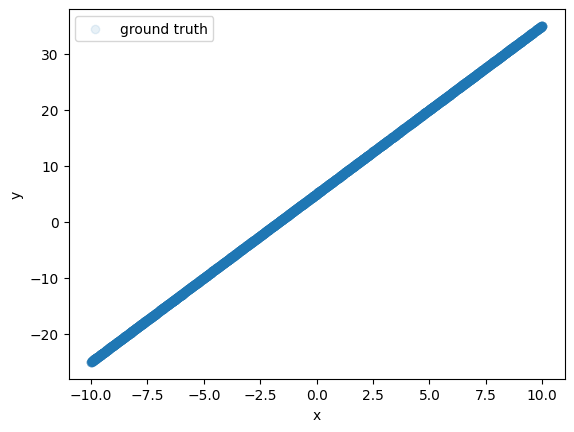

In [9]:
plt.scatter(x, y_gt, alpha=0.1, label='ground truth')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

We build a linear model using a single Keras dense layer. We will use the adam optimiser and the mean squared error loss. We train the model for 100 epochs using the `.fit` method.

In [10]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1, use_bias=True, input_shape=(1,)) # needs to units to learn a quadratic function
    ])

# Adam optimiser
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01, beta_1=0.9, beta_2=0.99, epsilon=1e-05, amsgrad=False,
    name='Adam')
  
# Model compiling settings
model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])

model.fit(
 x, y_gt,
 batch_size = 64,
 epochs = 100,
 validation_split = 0.2)

Epoch 1/100
125/125 [==============================] - 1s 2ms/step - loss: 120.0835 - mae: 9.1078 - mse: 120.0835 - val_loss: 62.7921 - val_mae: 6.6030 - val_mse: 62.7921
Epoch 2/100
125/125 [==============================] - 0s 1ms/step - loss: 32.3691 - mae: 4.5849 - mse: 32.3691 - val_loss: 13.8084 - val_mae: 3.0302 - val_mse: 13.8084
Epoch 3/100
125/125 [==============================] - 0s 1ms/step - loss: 7.1682 - mae: 2.3371 - mse: 7.1682 - val_loss: 3.5234 - val_mae: 1.8439 - val_mse: 3.5234
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 2.0914 - mae: 1.4193 - mse: 2.0914 - val_loss: 1.0311 - val_mae: 1.0154 - val_mse: 1.0311
Epoch 5/100
125/125 [==============================] - 0s 1ms/step - loss: 0.5019 - mae: 0.6848 - mse: 0.5019 - val_loss: 0.1535 - val_mae: 0.3917 - val_mse: 0.1535
Epoch 6/100
125/125 [==============================] - 0s 1ms/step - loss: 0.0504 - mae: 0.2034 - mse: 0.0504 - val_loss: 0.0045 - val_mae: 0.0669 - val_mse: 0.0045


Let's plot the model predictions `y_pred` for the training inputs `x` in red, and their ground truth values `y_gt` in blue.

313/313 [==============================] - 0s 658us/step


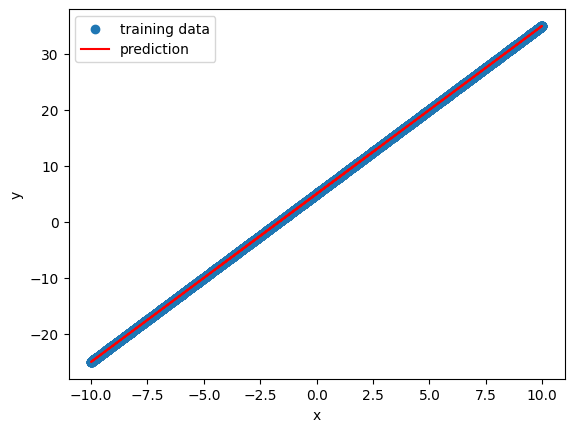

In [11]:
y_pred = model.predict(x)
plt.scatter(x, y_gt, label='training data')
plt.plot(x, y_pred, label='prediction', color='r')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Now we can convert the model into a tflite model and save it into the `../bela-tf-lite` folder.

In [12]:
# convert into tflite model # https://www.tensorflow.org/lite/models/convert/convert_models#convert_a_keras_model_
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/xf/y0yb8j3d5cdc9fs6prv5ht2h0000gn/T/tmpgo10tjke/assets


INFO:tensorflow:Assets written to: /var/folders/xf/y0yb8j3d5cdc9fs6prv5ht2h0000gn/T/tmpgo10tjke/assets
2023-01-02 22:40:34.995458: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-01-02 22:40:34.996040: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-01-02 22:40:35.000241: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/xf/y0yb8j3d5cdc9fs6prv5ht2h0000gn/T/tmpgo10tjke
2023-01-02 22:40:35.001089: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-01-02 22:40:35.001104: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/xf/y0yb8j3d5cdc9fs6prv5ht2h0000gn/T/tmpgo10tjke
2023-01-02 22:40:35.005713: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-01-02 22:40:35.006820: I tensorflow/cc/saved_model/load

In [13]:
# Save the model.
with open('../bela-tf-linear/model.tflite', 'wb') as f:
  f.write(tflite_model)